## RQ1: How working remotly corrolates with job satisfaction?
> In this notebook, the relationship between ***remote work options*** and ***job satisfaction*** is investigated. Stackoverflow publishes a survey every year and asks developers about different aspects of their working experience. In 2016, 2017 and 2019, developers were asked how they work remotely. I have gathered data from all three years and analyzed if there is a significant relationship between job satisfaction and working remotely.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from Wrangling import clean
%matplotlib inline

#### Clean function performs following actions:

> - Options to select for remote work option and job satisfaction is different each year. Clean function, unifies all the answers.
> - Removes answers where remote working style is null
> - Removes answers where job satisfaction is null

In [14]:
# clean the data using clean method in Wrangling.py file
df = clean_sat('all').copy()
df.head()

C:\Users\Hamid\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,remote,CareerSat
1,2016,Rarely or Never,5.0
3,2016,Part-time remote,5.0
7,2016,Rarely or Never,5.0
9,2016,Rarely or Never,4.0
11,2016,Part-time remote,5.0


In [15]:
df.describe()

,year,CareerSat
count,150017.000000,150017.000000
mean,2017.674837,3.949319
std,1.296461,1.052457
min,2016.000000,1.000000
25%,2016.000000,4.000000
50%,2017.000000,4.000000
75%,2019.000000,5.000000
max,2019.000000,5.000000


#### Job Satisfaction:
Job satisfaction is presented as numbers between one and 5 in thi data. Here is the meaning for each number:
> - **5**: Very Satisfied
> - **4**: Slightly satisfied
> - **3**: Neither satisfied nor dissatisfied
> - **2**: Slightly dissatisfie
> - **1**: Very dissatisfied

#### Exploring data
> - Fig1 , shows number and precentage of each answer for remote work question.
> - Fig2, shows histogram for each remote work option. In all the options, mod of the data is 


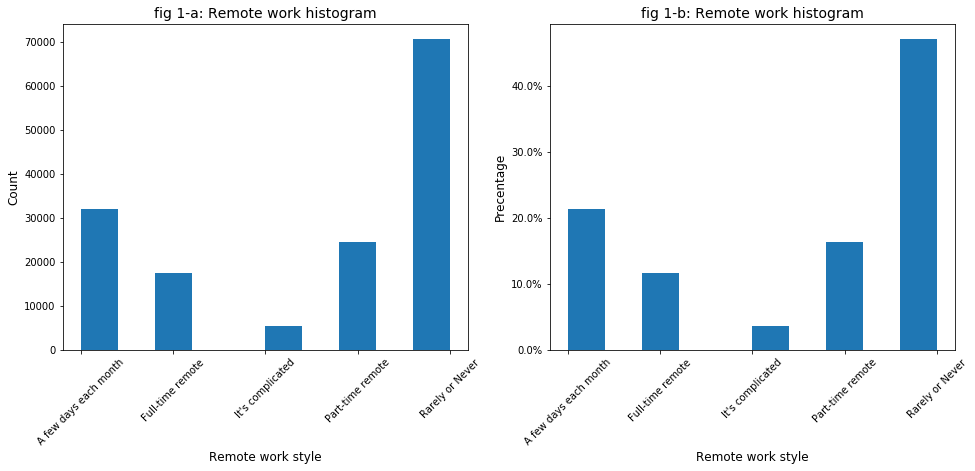

In [16]:
plt.figure(figsize= [16,6])
data = df.sort_values('remote')
base_color = sns.color_palette()[0]

plt.subplot(1,2,1)
plt.hist(data['remote'])
plt.tick_params(axis='x', rotation=45)
plt.title('fig 1-a: Remote work histogram', fontsize = 14);
plt.xlabel('Remote work style', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.subplot(1,2,2)
plt.hist(data['remote'], weights=np.ones(len(data)) / len(data))
plt.tick_params(axis='x', rotation=45)
plt.title('fig 1-b: Remote work histogram', fontsize = 14);
plt.xlabel('Remote work style', fontsize = 12)
plt.ylabel('Precentage', fontsize = 12)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

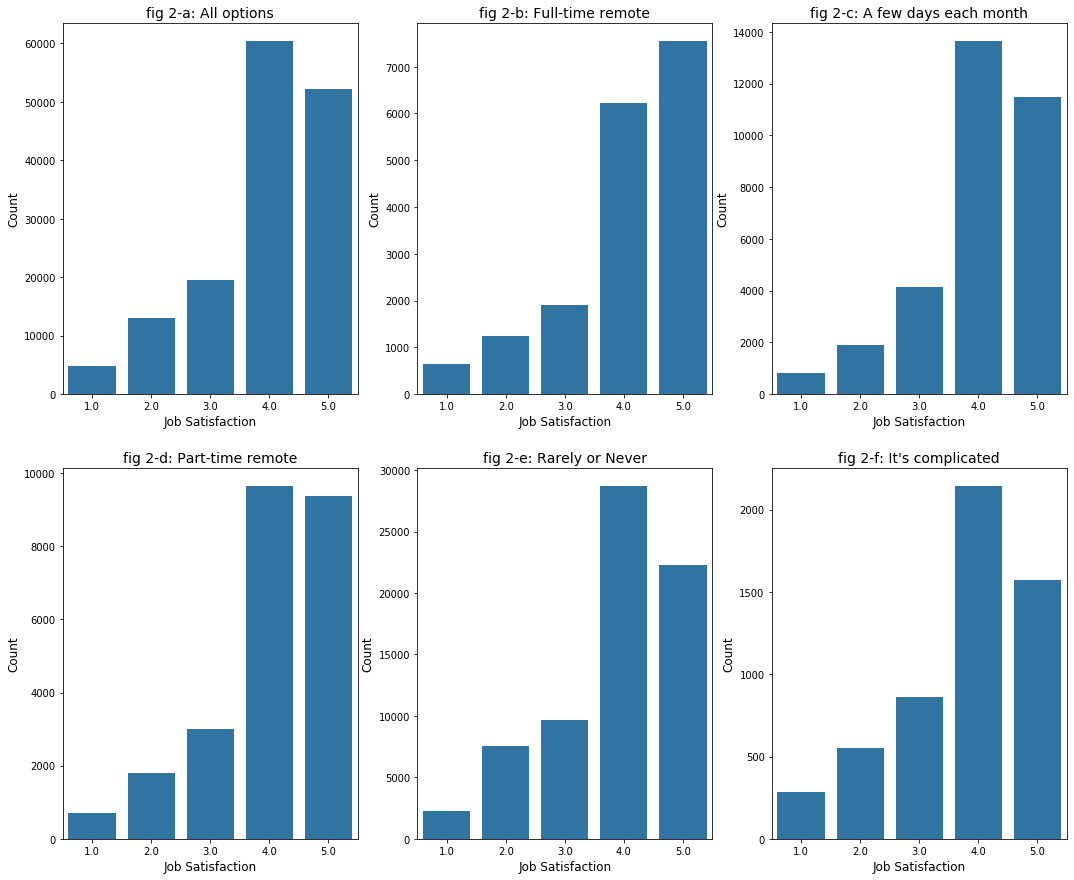

In [17]:
plt.figure(figsize= [18,15])

plt.subplot(2,3,1)
data = df
base_color = sns.color_palette()[0]
sns.countplot(data = data, x = 'CareerSat', color = base_color)
plt.title('fig 2-a: All options', fontsize = 14)
plt.xlabel('Job Satisfaction', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.subplot(2,3,2)
data = df[df.remote == 'Full-time remote' ]
base_color = sns.color_palette()[0]
sns.countplot(data = data, x = 'CareerSat', color = base_color)
plt.title('fig 2-b: Full-time remote', fontsize = 14)
plt.xlabel('Job Satisfaction', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.subplot(2,3,3)
data = df[(df.remote == 'A few days each month')]
base_color = sns.color_palette()[0]
sns.countplot(data = data, x = 'CareerSat', color = base_color)
plt.title('fig 2-c: A few days each month', fontsize = 14)
plt.xlabel('Job Satisfaction', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.subplot(2,3,4)
data = df[df.remote == 'Part-time remote' ]
base_color = sns.color_palette()[0]
sns.countplot(data = data, x = 'CareerSat', color = base_color)
plt.title('fig 2-d: Part-time remote', fontsize = 14)
plt.xlabel('Job Satisfaction', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.subplot(2,3,5)
data = df[df.remote == 'Rarely or Never' ]
base_color = sns.color_palette()[0]
sns.countplot(data = data, x = 'CareerSat', color = base_color)
plt.title('fig 2-e: Rarely or Never', fontsize = 14)
plt.xlabel('Job Satisfaction', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.subplot(2,3,6)
data = df[df.remote == "It's complicated" ]
base_color = sns.color_palette()[0]
sns.countplot(data = data, x = 'CareerSat', color = base_color)
plt.title("fig 2-f: It's complicated", fontsize = 14);
plt.xlabel('Job Satisfaction', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

In [18]:
# Calculate count, precentage, mean, var, std, lower 95 and upper 95
def calc_amt(df, col_name, col_calc):
    # Calculate mean for each remote category
    df_mean = df.groupby(col_name).mean()[col_calc].reset_index().rename(columns = {'CareerSat':'mean'})

    # Calculate var for each remote category
    df_var = df.groupby(col_name).var()[col_calc].reset_index().rename(columns = {'CareerSat':'var'})

    # Calculate std for each remote category
    df_std = df.groupby(col_name).std()[col_calc].reset_index().rename(columns = {'CareerSat':'std'})

    # Calculate count for each remote category
    df_count = df.groupby(col_name).count()[col_calc].reset_index().rename(columns = {'CareerSat':'count'})
    

    # Merge all
    df_all = pd.merge(df_mean, df_count, on='remote').merge(df_var, on='remote').merge(df_std, on='remote')

    # Calculate precentage
    df_all['perc'] = df_all['count'] / len(df)

    # Calculate upper and lower 95 quantiles
    df_all['lower_95'] = df_all['mean'] - 1.96*df_all['std']/np.sqrt(df_all['count'])
    df_all['upper_95'] = df_all['mean'] + 1.96*df_all['std']/np.sqrt(df_all['count'])

    return df_all


In [19]:
def color_mean(val, threshold = 4):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, green otherwise.
    """
    color = 'red' if val < threshold else 'green'
    return 'color: %s' % color

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [24]:
# check significance 
df_mean = calc_amt(df, 'remote','CareerSat')

df_mean.sort_values('mean', ascending = False).style.bar(subset=["mean"], color='lightgreen')
df_mean.style.set_caption("Table 1: Remote working options description")

,remote,mean,count,var,std,perc,lower_95,upper_95
0,A few days each month,4.036027,31976,0.951697,0.975549,0.213149,4.025334,4.046720
1,Full-time remote,4.072641,17552,1.139102,1.067287,0.117000,4.056852,4.088431
2,It's complicated,3.769259,5413,1.277311,1.130182,0.036083,3.739151,3.799367
3,Part-time remote,4.026884,24550,1.056510,1.027867,0.163648,4.014026,4.039742
4,Rarely or Never,3.866134,70526,1.156713,1.075506,0.470120,3.858197,3.874072


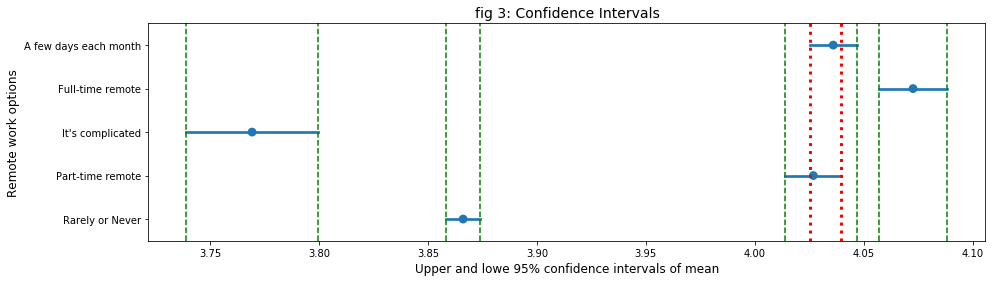

In [26]:
plt.figure(figsize= [15,4])
data1 = df_mean[['remote', 'upper_95']]
data2 = df_mean[['remote', 'lower_95']].rename(columns = {'lower_95':'upper_95'})
data = data1.append(data2)
sns.pointplot(data=data, x='upper_95', y='remote', join=False);
plt.title("fig 3: Confidence Intervals", fontsize = 14);
plt.ylabel('Remote work options', fontsize = 12)
plt.xlabel('Upper and lowe 95% confidence intervals of mean', fontsize = 12);
xcoords = data['upper_95']
for x in xcoords:
    if round(x,6) == 4.025334 or round(x,6) == 4.039742:
        color = 'red'
        plt.axvline(x=x, color=color, linestyle = 'dotted', linewidth =3)
    else :
        color = 'green'
        plt.axvline(x=x, color=color, linestyle = 'dashed')

### Conclusion
> - Table 1 suggests that remote working option corrolates with job satisfaction. Participants with remote work option are more stisfied with their work.

> - Fig 3 indicates that the difference between means of job satisfaction for each group is significant except for two groups ("A few days each month" and "Part-time remote")

> - Generally, participants with remote work option are more satisfied with their jobs comparing to participants who do not have this option.